In [53]:
import numpy as np
import pandas as pd
import re

In [54]:
input_path_1 = "1k_1w_1.log"
input_path_2 = "1k_1w_4.log"
input_path_3 = "1w_10w_1.log"
input_path_4 = "1w_10w_3.log"
input_path_5 = "1w_10w_4.log"
input_path_6 = "10w_over1.log"
input_path_7 = "10w_over2.log"
output_path = "{}.csv"

In [106]:
def pro(input_path):
    i = 0
    scanned_seed = []
    activate_node = []
    Hit_rate = []
    remain_seed = []
    merge_num_list = []
    merge_num = 0
    with open(input_path,'r') as f:
        line = f.readline()
        while line:
            try:
                if 'active' in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    activate_node.append(eval(res[6]))
                elif "Hit" in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    Hit_rate.append(eval(res[6]))
                    remain_seed.append(eval(res[7]))
                    merge_num_list.append(merge_num)
                    merge_num = 0
                elif "[+]Scanning" in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    scanned_seed.append(eval(res[6]))
                elif "merge" in line:
                    merge_num+=1
                line = f.readline()
            except:
                next(f)
                line = f.readline()
    len_ = min([len(Hit_rate), len(scanned_seed), len(activate_node), len(remain_seed), len(merge_num_list)])
    if len_>1000:
        return Hit_rate[:len_:10], scanned_seed[:len_:10], activate_node[:len_:10], remain_seed[:len_:10], merge_num_list[:len_:10]
    return Hit_rate[:len_], scanned_seed[:len_], activate_node[:len_], remain_seed[:len_], merge_num_list[:len_]

In [107]:
Hit_rate, scanned_seed, activate_node, remain_seed, merge_num_list = pro(input_path_2)

In [108]:
dic = {"hit_rate":Hit_rate,"remain_time":remain_seed,"scaned_number":scanned_seed,"activate_number":activate_node, "merge_num_list": merge_num_list}

In [109]:
len(dic["hit_rate"])

154

In [110]:
for i in range(7):
    path = eval("input_path_{}".format(i+1))
    Hit_rate, scanned_seed, activate_node, remain_seed, merge_num_list = pro(path)
    dic = {"hit_rate":Hit_rate,"remain_time":remain_seed,"scaned_number":scanned_seed,"activate_number":activate_node,"merge_num_list": merge_num_list}
    df = pd.DataFrame(dic)
    df.to_csv(output_path.format(i+1),index=False)
    

# 画图

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#设置格式
sns.set_style("white")
BGP_list = ['2001:1291::/32',
'2001:1498::/32',
'2001:1458::/32',
'2001:41d0::/32',
'2001:470::/32',
'2003::/19',
'240e:380::/29'
]

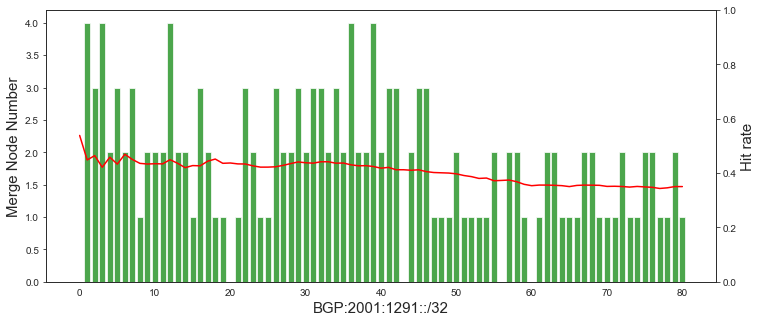

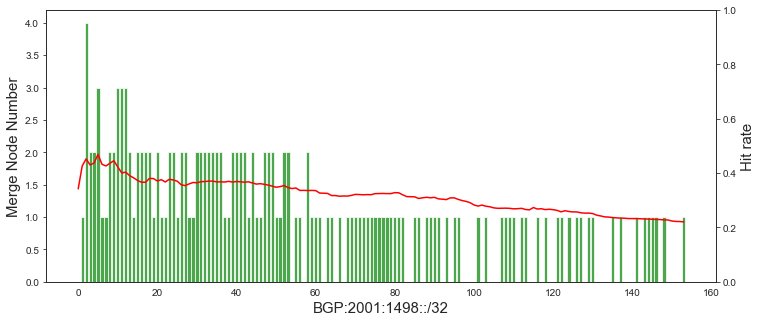

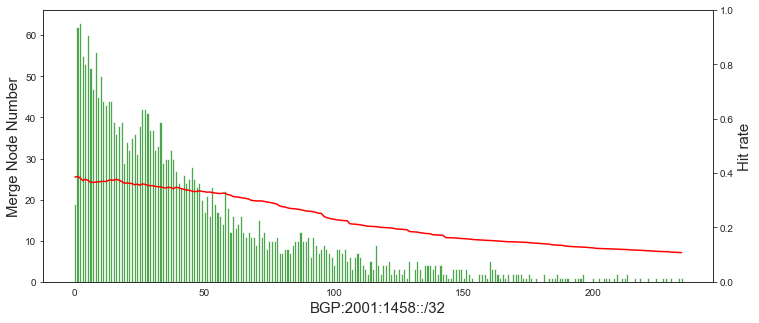

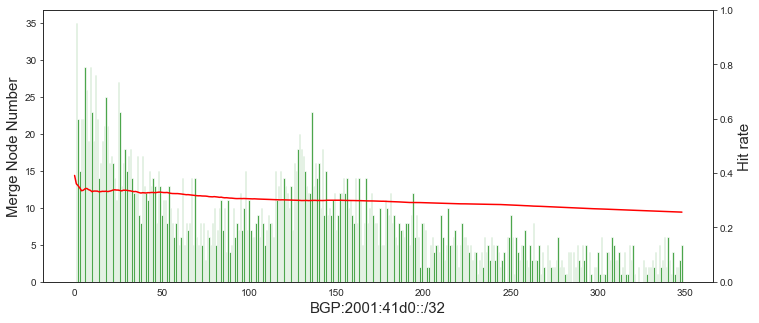

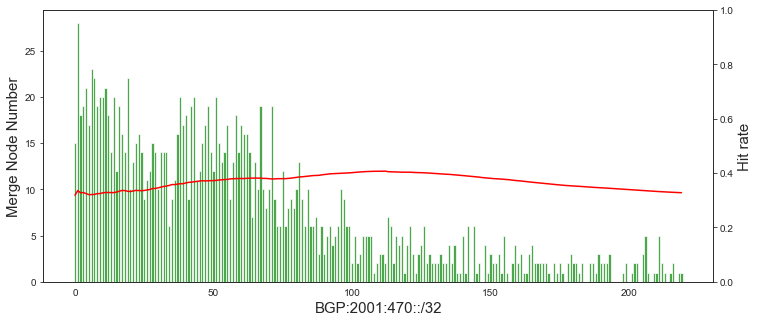

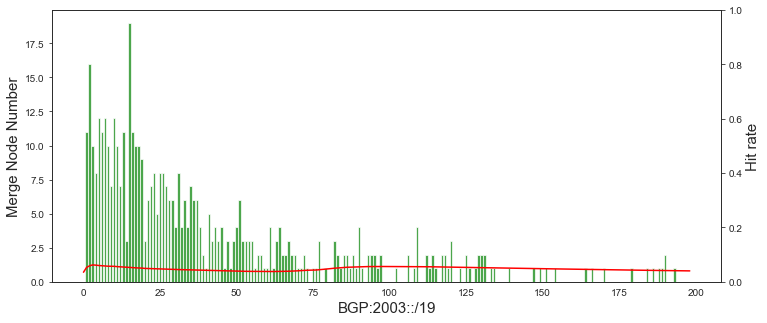

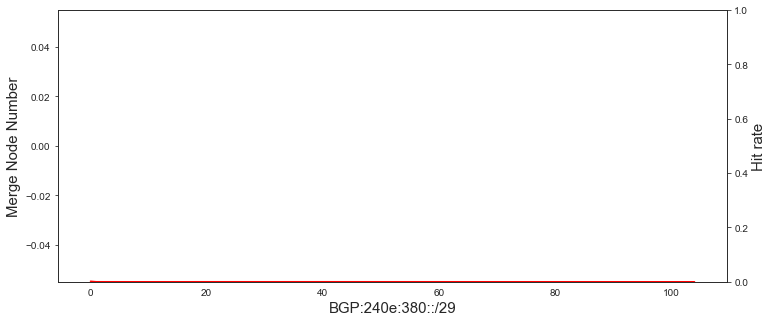

In [121]:
#取出作图的数据
for i in range(7):
    data = pd.read_csv(output_path.format(i+1))
    x = list(data.index)
    y1 = data["merge_num_list"]
    y2 = data["hit_rate"]
    #设置图形大小
    plt.rcParams['figure.figsize'] = (12.0,5.0)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(x, y1,alpha=0.7,color='g')
    ax1.set_ylabel('Merge Node Number',fontsize='15')
    ax1.set_xlabel("BGP:"+BGP_list[i], fontsize='15')
    #ax1.set_title("数据统计",fontsize='20')
    #画折线图 
    ax2 = ax1.twinx()   #组合图必须加这个
    ax2.plot(x, y2, 'r',ms=10)
    ax2.set_ylabel('Hit rate',fontsize='15')
    ax2.set_ylim([0, 1])
    plt.show()
    fig.savefig(output_path.format(i+1)+".jpg", dpi = 100)
    

In [100]:
len(list(pd.read_csv(output_path.format(i+1)).index))

1046